In [1]:
%install-swiftpm-flags -c release
%install '.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")' SwiftProtobuf
import SwiftProtobuf

Installing packages:
	.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")
		SwiftProtobuf
With SwiftPM flags: ['-c', 'release']
Working in: /tmp/tmp6stjb4jx/swift-install
Fetching https://github.com/apple/swift-protobuf.git
Cloning https://github.com/apple/swift-protobuf.git
Resolving https://github.com/apple/swift-protobuf.git at 1.7.0
[1/2] Compiling SwiftProtobuf AnyMessageStorage.swift
[2/3] Compiling jupyterInstalledPackages jupyterInstalledPackages.swift
[3/3] Linking libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


In [2]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [3]:
import Python
import TensorFlow

In [4]:
let plt = Python.import("matplotlib.pyplot")

In [5]:
let SAMPLE_SIZE = 100

let a: Float = 2.0
let b: Float = 1.5
let x = Tensor<Float>(rangeFrom: 0, to: 1, stride: 1.0 / Float(SAMPLE_SIZE))
let noise = (Tensor<Float>(randomNormal: [SAMPLE_SIZE]) - 0.5) * 0.1
let y = (a * x + b) + noise

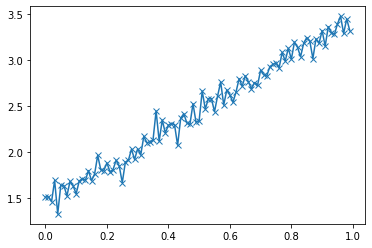

None


In [6]:
plt.clf()
plt.plot(x.makeNumpyArray(), y.makeNumpyArray(), marker: "x")
plt.show()

In [7]:
print(x.shape)
print(y.shape)

[100]
[100]


In [8]:
let X = x.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
let Y = y.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
print(X.shape)
print(Y.shape)

[100, 1]
[100, 1]


In [9]:
struct LinearRegression: Layer {
    var layer1 = Dense<Float>(inputSize: 1, outputSize: 1, activation: identity)
    
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return layer1(input)
    }
}


In [10]:
var regression = LinearRegression()
let optimizer = SGD(for: regression, learningRate: 0.03)
Context.local.learningPhase = .training

In [11]:
for _ in 0..<1000 {
    let 𝛁model = regression.gradient { r -> Tensor<Float> in
        let ŷ = r(X)
        let loss = meanSquaredError(predicted: ŷ, expected: Y)
        print("Loss: \(loss)")
        return loss
    }
    optimizer.update(&regression, along: 𝛁model)
}

Loss: 6.988737
Loss: 5.9870133
Loss: 5.131163
Loss: 4.3999248
Loss: 3.7751386
Loss: 3.2412903
Loss: 2.7851288
Loss: 2.395331
Loss: 2.0622263
Loss: 1.7775524
Loss: 1.5342523
Loss: 1.3262967
Loss: 1.1485355
Loss: 0.9965686
Loss: 0.8666377
Loss: 0.7555321
Loss: 0.6605088
Loss: 0.57922494
Loss: 0.50967896
Loss: 0.45016086
Loss: 0.39921
Loss: 0.35557872
Loss: 0.318201
Loss: 0.28616628
Loss: 0.2586966
Loss: 0.23512754
Loss: 0.21489139
Loss: 0.19750316
Loss: 0.18254864
Loss: 0.16967387
Loss: 0.15857658
Loss: 0.14899848
Loss: 0.14071892
Loss: 0.13354947
Loss: 0.12732902
Loss: 0.121920064
Loss: 0.117205046
Loss: 0.11308363
Loss: 0.10947
Loss: 0.106290914
Loss: 0.10348374
Loss: 0.100995004
Loss: 0.09877902
Loss: 0.09679674
Loss: 0.0950148
Loss: 0.09340471
Loss: 0.09194214
Loss: 0.09060624
Loss: 0.08937927
Loss: 0.08824601
Loss: 0.08719349
Loss: 0.08621058
Loss: 0.08528782
Loss: 0.0844171
Loss: 0.08359146
Loss: 0.08280502
Loss: 0.0820527
Loss: 0.08133015
Loss: 0.08063364
Loss: 0.07996004
Loss: 0.

Loss: 0.010810549
Loss: 0.010790839
Loss: 0.010771288
Loss: 0.010751889
Loss: 0.010732641
Loss: 0.010713551
Loss: 0.010694606
Loss: 0.010675813
Loss: 0.010657169
Loss: 0.010638673
Loss: 0.010620326
Loss: 0.010602116
Loss: 0.01058406
Loss: 0.010566141
Loss: 0.0105483625
Loss: 0.010530728
Loss: 0.010513228
Loss: 0.010495871
Loss: 0.010478651
Loss: 0.010461565
Loss: 0.010444612
Loss: 0.010427797
Loss: 0.01041111
Loss: 0.010394559
Loss: 0.010378141
Loss: 0.010361849
Loss: 0.01034569
Loss: 0.010329656
Loss: 0.010313749
Loss: 0.010297963
Loss: 0.010282309
Loss: 0.010266775
Loss: 0.010251365
Loss: 0.010236077
Loss: 0.010220907
Loss: 0.010205857
Loss: 0.010190928
Loss: 0.010176119
Loss: 0.01016143
Loss: 0.010146851
Loss: 0.010132388
Loss: 0.010118035
Loss: 0.010103805
Loss: 0.010089683
Loss: 0.0100756725
Loss: 0.010061774
Loss: 0.010047984
Loss: 0.010034309
Loss: 0.010020736
Loss: 0.010007267
Loss: 0.009993906
Loss: 0.009980658
Loss: 0.009967509
Loss: 0.009954462
Loss: 0.009941522
Loss: 0.0099

Loss: 0.008379644
Loss: 0.008379151
Loss: 0.008378658
Loss: 0.008378175
Loss: 0.008377698
Loss: 0.0083772205
Loss: 0.008376748
Loss: 0.00837628
Loss: 0.008375812
Loss: 0.00837535
Loss: 0.008374894
Loss: 0.008374442
Loss: 0.008373988
Loss: 0.008373545
Loss: 0.008373098
Loss: 0.008372659
Loss: 0.008372225
Loss: 0.008371791
Loss: 0.008371358
Loss: 0.008370931
Loss: 0.0083705075
Loss: 0.008370088
Loss: 0.008369673
Loss: 0.00836926
Loss: 0.00836885
Loss: 0.008368438
Loss: 0.0083680395
Loss: 0.008367642
Loss: 0.008367243
Loss: 0.00836685
Loss: 0.008366456
Loss: 0.008366069
Loss: 0.008365687
Loss: 0.0083653
Loss: 0.008364926
Loss: 0.008364548
Loss: 0.008364176
Loss: 0.008363807
Loss: 0.00836344
Loss: 0.008363076
Loss: 0.008362715
Loss: 0.0083623575
Loss: 0.008362004
Loss: 0.00836165
Loss: 0.0083613
Loss: 0.008360953
Loss: 0.008360612
Loss: 0.008360268
Loss: 0.008359929
Loss: 0.008359593
Loss: 0.00835926
Loss: 0.008358928
Loss: 0.0083586015
Loss: 0.008358273


In [12]:
let weight = Float(regression.layer1.weight[0][0])!
let bias = Float(regression.layer1.bias[0])!
print(weight, bias)

1.9828945 1.4585879


In [13]:
Context.local.learningPhase = .inference
let score = regression(X)
let y2 = score.reshaped(toShape: [100])

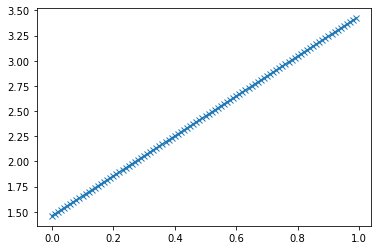

None


In [14]:
plt.clf()
plt.plot(x.makeNumpyArray(), y2.makeNumpyArray(), marker: "x")
plt.show()

In [16]:
%include "./CoreMLProto/ArrayFeatureExtractor.pb.swift"

In [17]:
%include "./CoreMLProto/BayesianProbitRegressor.pb.swift"

In [18]:
%include "./CoreMLProto/DataStructures.pb.swift"

In [19]:
%include "./CoreMLProto/CategoricalMapping.pb.swift"

In [20]:
%include "./CoreMLProto/CustomModel.pb.swift"

In [21]:
%include "./CoreMLProto/DictVectorizer.pb.swift"

In [22]:
%include "./CoreMLProto/FeatureTypes.pb.swift"

In [23]:
%include "./CoreMLProto/FeatureVectorizer.pb.swift"

In [24]:
%include "./CoreMLProto/GLMClassifier.pb.swift"

In [25]:
%include "./CoreMLProto/GLMRegressor.pb.swift"

In [26]:
%include "./CoreMLProto/Gazetteer.pb.swift"

In [27]:
%include "./CoreMLProto/Identity.pb.swift"

In [28]:
%include "./CoreMLProto/Imputer.pb.swift"

In [29]:
%include "./CoreMLProto/Scaler.pb.swift"

In [30]:
%include "./CoreMLProto/ItemSimilarityRecommender.pb.swift"

In [31]:
%include "./CoreMLProto/Parameters.pb.swift"

In [32]:
%include "./CoreMLProto/Normalizer.pb.swift"

In [33]:
%include "./CoreMLProto/LinkedModel.pb.swift"

In [34]:
%include "./CoreMLProto/NearestNeighbors.pb.swift"

In [35]:
%include "./CoreMLProto/NonMaximumSuppression.pb.swift"

In [36]:
%include "./CoreMLProto/OneHotEncoder.pb.swift"

In [37]:
%include "./CoreMLProto/SVM.pb.swift"

In [38]:
%include "./CoreMLProto/SoundAnalysisPreprocessing.pb.swift"

In [39]:
%include "./CoreMLProto/TextClassifier.pb.swift"

In [40]:
%include "./CoreMLProto/TreeEnsemble.pb.swift"

In [41]:
%include "./CoreMLProto/VisionFeaturePrint.pb.swift"

In [42]:
%include "./CoreMLProto/WordEmbedding.pb.swift"

In [43]:
%include "./CoreMLProto/WordTagger.pb.swift"

In [44]:
%include "./CoreMLProto/NeuralNetwork.pb.swift"

In [45]:
%include "./CoreMLProto/Model.pb.swift"

In [ ]:
let coreModel = CoreML_Specification_Model.with {
    $0.specificationVersion = 4
    $0.description_p = CoreML_Specification_ModelDescription.with {
        $0.input = [CoreML_Specification_FeatureDescription.with {
            $0.name = "dense_input"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }]
        $0.output = [CoreML_Specification_FeatureDescription.with {
            $0.name = "output"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }]
        $0.trainingInput = [CoreML_Specification_FeatureDescription.with {
            $0.name = "dense_input"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }, {
            $0.name = "output_true"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }

        }]
        $0.metadata = CoreML_Specification_Metadata.with {
            $0.shortDescription = "Trivial linear classifier"
            $0.author = "Jacopo Mangiavacchi"
            $0.license = "MIT"
            $0.userDefined = ["coremltoolsVersion" : "3.1"]
        }
    }
    $0.isUpdatable = true
    $0.neuralNetwork = CoreML_Specification_NeuralNetwork.with {
        $0.layers = [CoreML_Specification_NeuralNetworkLayer.with {
            $0.name = "dense_1"
            $0.input = ["dense_input"]
            $0.output = ["output"]
            $0.isUpdatable = true
            $0.innerProduct = CoreML_Specification_InnerProductLayerParams.with {
                $0.inputChannels = 1
                $0.outputChannels = 1
                $0.hasBias_p = true
                $0.weights = CoreML_Specification_WeightParams.with {
                    $0.floatValue = [weight]
                    $0.isUpdatable = true
                }
                $0.bias = CoreML_Specification_WeightParams.with {
                    $0.floatValue = [bias]
                    $0.isUpdatable = true
                }
            }
        }]
        $0.updateParams = CoreML_Specification_NetworkUpdateParameters.with {
            $0.lossLayers = CoreML_Specification_LossLayer.with {
                $0.name = "lossLayer"
                $0.meanSquaredErrorLossLayer = CoreML_Specification_MeanSquaredErrorLossLayer.with {
                    $0.input = "output"
                    $0.target = "output_true"
                }
            }
            $0.optimizer = CoreML_Specification_Optimizer.with {
                $0.sgdOptimizer = CoreML_Specification_SGDOptimizer.with {
                    $0.learningRate = 
                    $0.miniBatchSize = 
                    $0.momentum = 
                }
            }
            $0.epochs = CoreML_Specification_
            $0.shuffle = CoreML_Specification_
        }
    }
}


In [ ]:
let binaryModelData: Data = try coreModel.serializedData()

In [ ]:
binaryModelData.write(to: URL(fileURLWithPath: "./s4tf_model_personalization.mlmodel"))